In [7]:
import requests
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import os,sys

In [8]:
data = pd.read_csv("sampleset.csv")
images = data["Image Link"]

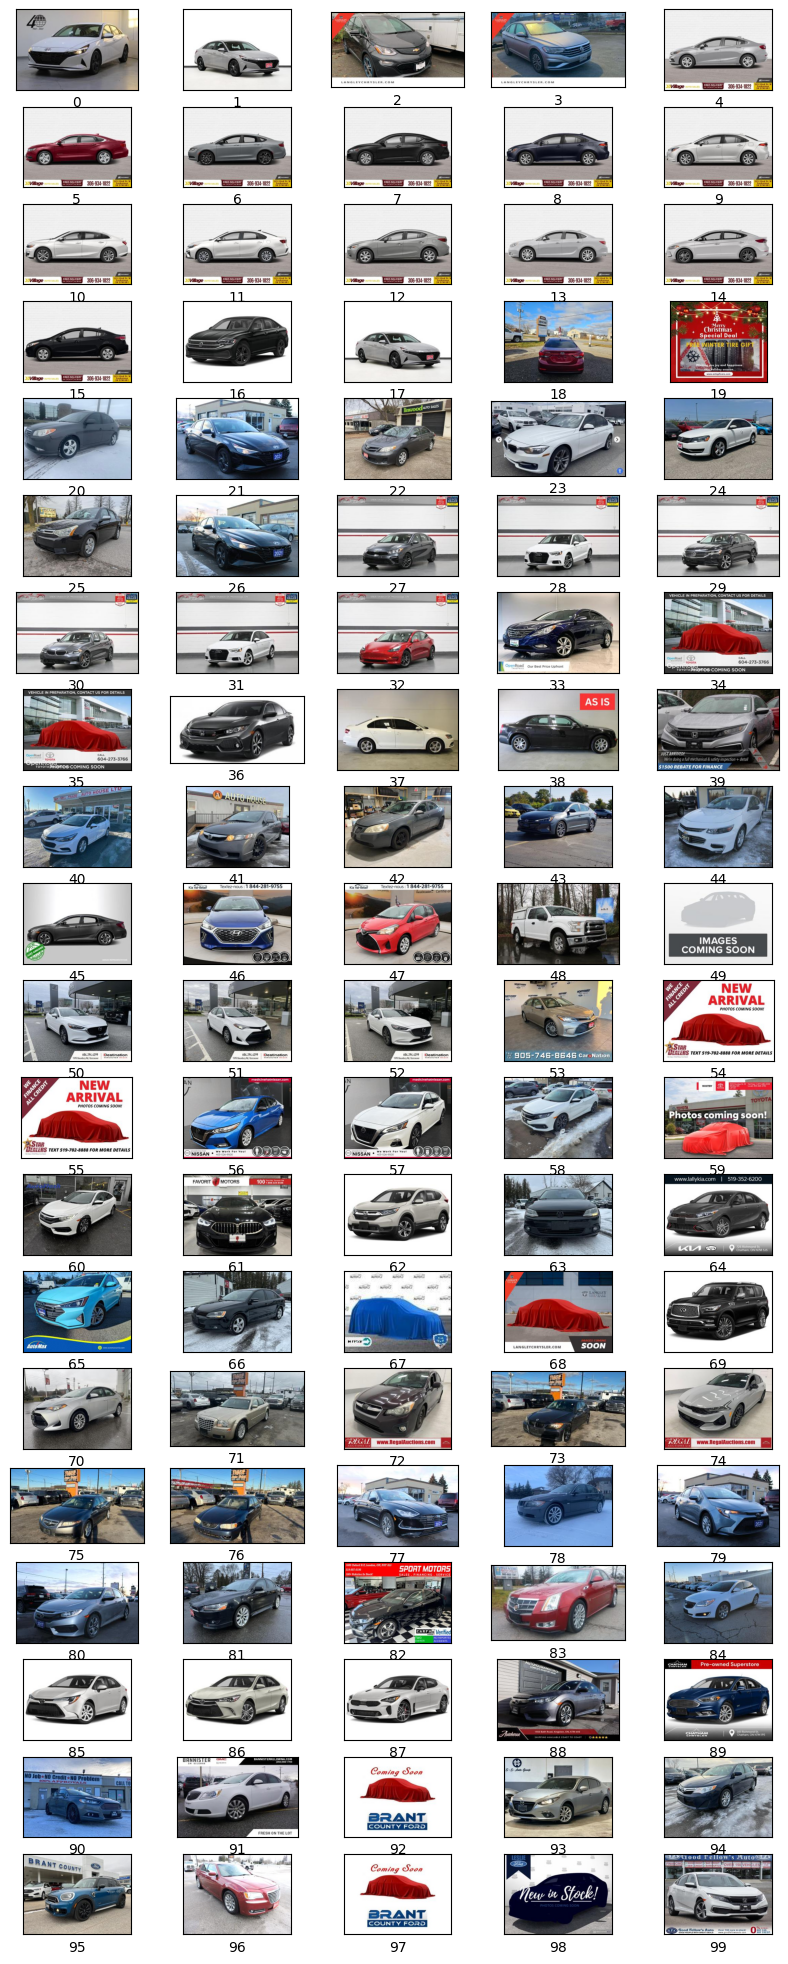

In [88]:
#imageSet = []
plt.figure(figsize=(10,25))
for i in range(100):
    plt.subplot(20,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    response = requests.get(images[i])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(str(i))
plt.show()

Looking at this small sample of 50 vehicle images from the 1000 entries we can see that many of these vehicle images are stock images/placeholder images that we might not be concerned with. If we look at images 

place holders:
1,4,5,6,7,8,9,10,11,12,13,14,15,16
16,17,19,34,36,45

place holders: (tarp style)
43,35,49

Now lets create the dataset that will allow us to try our hand at some iamge classification

In [41]:
response = requests.get(images[8])
img = Image.open(BytesIO(response.content))
new = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
new = cv2.resize(new,(256,256)) / 255
dataPath = os.getcwd()+"\\data\\placeholder\\8.jpg"
img.save(dataPath)

In [5]:
def createBinaryFolders(images,n):
    #vehicleIndices = [*range(0,n)]
    #noplaceHolderIndices = list(set(vehicleIndices)-set(placeHolderIndices))
    for k in range(0,n):
        response = requests.get(images[k])
        img = Image.open(BytesIO(response.content))
        dataPath = os.getcwd()+"\\data\\noplaceholder\\Image"+str(k)+".jpg"
        img.save(dataPath)

In [6]:
createBinaryFolders(images,1000)

KeyError: 249

In [9]:
# Now lets create a model that we will use to do the classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [10]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        

In [ ]:
# Lets split the datasets 

In [14]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

trainDataset = train.flow_from_directory('data',
                                          target_size = (256,256),
                                          batch_size = 25,
                                          class_mode = 'binary')
validationDataset = train.flow_from_directory('data',
                                          target_size = (256,256),
                                          batch_size = 25,
                                          class_mode = 'binary')

Found 251 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


In [13]:
trainDataset.class_indices

{'noplaceholder': 0, 'placeholder': 1}

In [15]:
model_fit = model.fit(trainDataset,steps_per_epoch=10,epochs = 100,validation_data=validationDataset)
# steps_per_epoch

Epoch 1/100


26/26 [==============================] - 4s 100ms/step - loss: 0.6613 - accuracy: 0.7251 - val_loss: 0.4592 - val_accuracy: 0.7649
Epoch 2/100
26/26 [==============================] - 2s 94ms/step - loss: 0.4565 - accuracy: 0.8088 - val_loss: 0.4206 - val_accuracy: 0.8526
Epoch 3/100
26/26 [==============================] - 3s 96ms/step - loss: 0.2937 - accuracy: 0.9044 - val_loss: 0.3198 - val_accuracy: 0.8884
Epoch 4/100
26/26 [==============================] - 2s 95ms/step - loss: 0.1871 - accuracy: 0.9323 - val_loss: 0.1563 - val_accuracy: 0.9402
Epoch 5/100
26/26 [==============================] - 2s 94ms/step - loss: 0.0756 - accuracy: 0.9841 - val_loss: 0.0328 - val_accuracy: 0.9920
Epoch 6/100
26/26 [==============================] - 2s 95ms/step - loss: 0.1125 - accuracy: 0.9761 - val_loss: 0.0441 - val_accuracy: 0.9920
Epoch 7/100
26/26 [==============================] - 2s 95ms/step - loss: 0.0380 - accuracy: 0.9920 - val_loss: 0.0350 - val_accuracy: 0.9920
Epo

Lets test this with some images

1/1 [==============================] - 0s 219ms/step


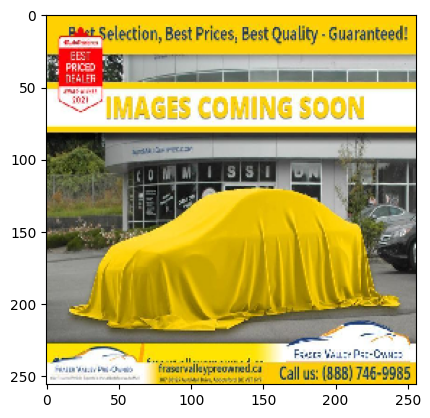

Classification score is: [[0.]]
noplaceholder


In [40]:
imgs = image.load_img("test/Image7.jpg",target_size=(256,256))
X = image.img_to_array(imgs)
X = np.expand_dims(X,axis=0)
inputX = np.vstack([X])
val = model.predict(inputX)
imgs
plt.imshow(imgs)
plt.show()
print("Classification score is:",val)
if val == 1:
    print("placeholder")
else:
    print("noplaceholder")
    